In [25]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
import io

In [26]:
# Specify the path to your Excel file
excel_file = '../../../data/raw/flight-Newhaven-waste.xls'

# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(excel_file, sheet_name=None)

# Dictionary to store extracted columns
NHM = {}
# Iterate through each sheet
for sheet_name, df in sheets_dict.items():
    # Iterate through each column
    for column in df.columns:
        # Check if 'GHG QUANTITY (METRIC TONS CO2e)' is in any cell of the column
        if 'GHG QUANTITY (METRIC TONS CO2e)' in df[column].values:
            # If found, extract the column and store it in the dictionary
            NHM[sheet_name] = df[column]
            break  # Break the loop once the column is found to avoid duplicates

In [27]:
# Specify the path to your Excel file
excel_file = '../../../data/raw/flight-hartford-waste.xls'

# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(excel_file, sheet_name=None)

# Dictionary to store extracted columns
HEM = {}
# Iterate through each sheet
for sheet_name, df in sheets_dict.items():
    # Iterate through each column
    for column in df.columns:
        # Check if 'GHG QUANTITY (METRIC TONS CO2e)' is in any cell of the column
        if 'GHG QUANTITY (METRIC TONS CO2e)' in df[column].values:
            # If found, extract the column and store it in the dictionary
            HEM[sheet_name] = df[column]
            break  # Break the loop once the column is found to avoid duplicates

In [28]:
# Specify the path to your Excel file
excel_file = '../../../data/raw/flight-bridgeport-waste.xls'

# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(excel_file, sheet_name=None)

# Dictionary to store extracted columns
BSN = {}
# Iterate through each sheet
for sheet_name, df in sheets_dict.items():
    # Iterate through each column
    for column in df.columns:
        # Check if 'GHG QUANTITY (METRIC TONS CO2e)' is in any cell of the column
        if 'GHG QUANTITY (METRIC TONS CO2e)' in df[column].values:
            # If found, extract the column and store it in the dictionary
            BSN[sheet_name] = df[column]
            break  # Break the loop once the column is found to avoid duplicates

In [29]:
NHM_waste = {}

for year, df in NHM.items():
    if len(df) > 6:
        NHM_waste[year] = int(df.iloc[6]) if not pd.isnull(df.iloc[6]) else 0
    else:
        NHM_waste[year] = 0

In [30]:
BSN_waste = {}

for year, df in BSN.items():
    if len(df) > 6:
        BSN_waste[year] = int(df.iloc[6]) if not pd.isnull(df.iloc[6]) else 0
    else:
        BSN_waste[year] = 0

In [31]:
HEM_waste = {}

for year, series in HEM.items():
    # Extract numerical values from the series starting from row 6
    values = series.iloc[6:].dropna().astype(int)
    # Sum up the extracted values
    HEM_waste[year] = values.sum()

In [49]:
#creating a dataframe having all the historical waste information
NHM = pd.DataFrame(list(NHM_waste.items()), columns=['Year', 'New Haven waste emissions (MTCO2e)'])
HEM = pd.DataFrame(list(HEM_waste.items()), columns=['Year', 'Hartford waste emissions (MTCO2e)'])
BSN = pd.DataFrame(list(BSN_waste.items()), columns=['Year', 'Bridgeport waste emissions (MTCO2e)'])

total = NHM
total['Hartford waste emissions (MTCO2e)']= HEM['Hartford waste emissions (MTCO2e)']
total['Bridgeport waste emissions (MTCO2e)']= BSN['Bridgeport waste emissions (MTCO2e)']

total = total[::-1].reset_index(drop=True)
total
total.to_csv('../../../data/tidy/solid-waste-emissions.csv')

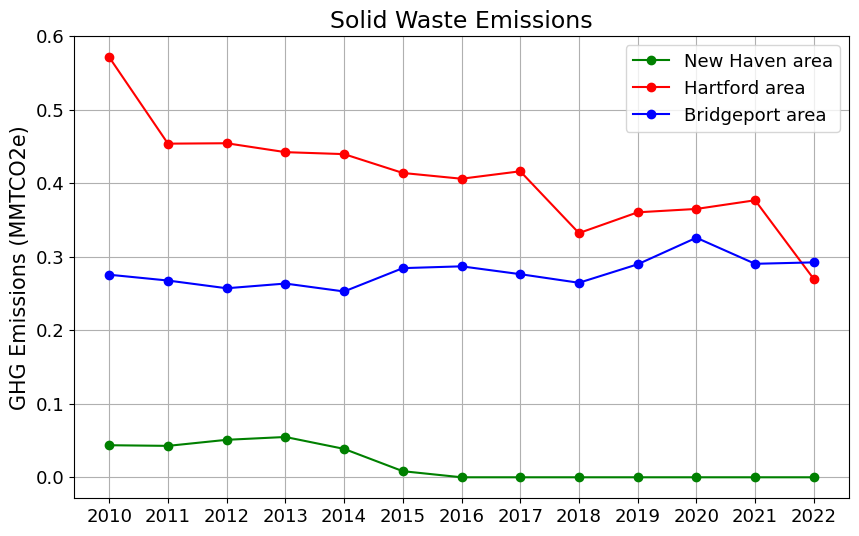

In [47]:
plt.figure(figsize=(10, 6)) 
# Plot DVMT against years
plt.plot(total['Year'], total['New Haven waste emissions (MTCO2e)']/1000000, marker='o', color='g', linestyle='-', label='New Haven area')
plt.plot(total['Year'], total['Hartford waste emissions (MTCO2e)']/1000000, marker='o', color='r', linestyle='-', label='Hartford area')
plt.plot(total['Year'], total['Bridgeport waste emissions (MTCO2e)']/1000000, marker='o', color='b', linestyle='-', label='Bridgeport area')

# Set labels and title
#plt.xlabel('Year',fontsize=20)
plt.ylabel('GHG Emissions (MMTCO2e)',fontsize=15)
plt.title('Solid Waste Emissions',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

# Show grid
plt.grid(True)

# Save or display the plot
plt.savefig('../../../figures/solid-waste-historical-emissions.png', dpi=600, bbox_inches='tight')